In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# load the dataset
df = pd.read_csv('agricultural.csv')

# view the first few rows of the dataset
df.head()

,Location,Age,Education_Level,Gender,Loan_Amount,Interest_Rate,Repayment_Period,Loan_Type,Crop_Yield_Before,Crop_Yield_After,Farm_Size,Income_Before,Income_After,Seeds_Purchased,Fertilizers_Purchased,Machinery_Purchased,Weather_Conditions,Market_Access,Productivity_Improvement_Index
0,Kitui,45,No formal education,Male,229739,17.89,6,General,1468,1465,2.88,81868,112804,232.67,171.03,0,Good,Moderate,0.57
1,Murang'a,38,Secondary education,Female,157238,12.70,24,Equipment,1733,2158,1.55,32346,52508,92.44,103.54,1,Good,High,0.97
2,Kisumu,47,No formal education,Male,152155,10.86,24,Equipment,1961,2506,2.03,45952,78334,147.29,83.08,1,Good,Moderate,1.00
3,Nyeri,58,Secondary education,Female,163350,14.80,24,Fertilizer,2531,2869,1.10,55026,75213,70.49,56.82,0,Good,Moderate,0.57
4,Nyeri,37,Tertiary education,Male,171551,5.15,24,Seeds,2042,2444,2.43,94726,112099,211.23,180.87,1,Good,Low,0.54


In [ ]:
df.tail()

,Location,Age,Education_Level,Gender,Loan_Amount,Interest_Rate,Repayment_Period,Loan_Type,Crop_Yield_Before,Crop_Yield_After,Farm_Size,Income_Before,Income_After,Seeds_Purchased,Fertilizers_Purchased,Machinery_Purchased,Weather_Conditions,Market_Access,Productivity_Improvement_Index
128952,Machakos,42,Secondary education,Male,148819,14.76,12,Seeds,2672,3041,1.31,59127,66835,116.99,49.84,0,Moderate,Moderate,0.36
128953,Kericho,38,Primary education,Male,307158,7.09,12,Seeds,2179,2448,1.67,35690,51892,90.37,111.16,1,Poor,High,0.69
128954,Nyeri,27,Secondary education,Male,215711,16.94,12,Seeds,2993,3264,1.56,64572,81063,84.33,73.53,0,Moderate,Low,0.45
128955,Migori,50,Secondary education,Male,294979,16.49,36,General,2772,3131,2.19,32585,67617,210.81,113.94,0,Good,High,1.00
128956,Murang'a,39,Tertiary education,Male,24918,13.67,36,Seeds,2449,2876,2.20,66367,75925,205.09,67.93,0,Good,Moderate,0.47


In [ ]:
# high level view of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128957 entries, 0 to 128956
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Location                        128957 non-null  object 
 1   Age                             128957 non-null  int64  
 2   Education_Level                 128957 non-null  object 
 3   Gender                          128957 non-null  object 
 4   Loan_Amount                     128957 non-null  int64  
 5   Interest_Rate                   128957 non-null  float64
 6   Repayment_Period                128957 non-null  int64  
 7   Loan_Type                       128957 non-null  object 
 8   Crop_Yield_Before               128957 non-null  int64  
 9   Crop_Yield_After                128957 non-null  int64  
 10  Farm_Size                       128957 non-null  float64
 11  Income_Before                   128957 non-null  int64  
 12  Income_After    

In [ ]:
# check for missing values
df.isnull().sum()

,0
Location,0
Age,0
Education_Level,0
Gender,0
Loan_Amount,0
Interest_Rate,0
Repayment_Period,0
Loan_Type,0
Crop_Yield_Before,0
Crop_Yield_After,0


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# Data type Correction
df['Machinery_Purchased'] = df['Machinery_Purchased'].astype('object')



df['Machinery_Purchased'] = df['Machinery_Purchased'].replace({1: 'Yes',
                                                               0: 'No'})

In [ ]:
# summary statistics
df.describe()

,Age,Loan_Amount,Interest_Rate,Repayment_Period,Crop_Yield_Before,Crop_Yield_After,Farm_Size,Income_Before,Income_After,Seeds_Purchased,Fertilizers_Purchased,Productivity_Improvement_Index
count,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000,128957.000000
mean,39.677575,200083.495049,11.507933,16.822166,1999.065037,2298.245392,2.012891,49885.810278,64897.019456,150.960163,100.690074,0.611208
std,11.562250,79452.966444,3.749365,9.222482,499.308981,521.309263,0.969865,19961.713821,22327.374114,79.713025,58.197349,0.252932
min,18.000000,10000.000000,5.000000,6.000000,-189.000000,52.000000,0.200000,-44592.000000,-32098.000000,10.000000,5.000000,0.000000
25%,31.000000,145524.000000,8.270000,12.000000,1661.000000,1945.000000,1.320000,36451.000000,49992.000000,93.620000,57.700000,0.430000
50%,40.000000,199818.000000,11.500000,12.000000,2000.000000,2299.000000,2.000000,49900.000000,64861.000000,144.540000,92.720000,0.600000
75%,48.000000,253876.000000,14.760000,24.000000,2337.000000,2651.000000,2.680000,63371.000000,79899.000000,201.160000,135.770000,0.800000
max,70.000000,500000.000000,18.000000,36.000000,4111.000000,4615.000000,5.000000,136318.000000,158491.000000,499.920000,374.730000,1.000000


In [ ]:
# create a copy of df
df_copy = df.copy()

from scipy.stats.mstats import winsorize
# Apply Winsorization (Capping values beyond 5th and 95th percentile)
df_copy['Crop_Yield_Before'] = winsorize(df_copy['Crop_Yield_Before'], limits=[0.05, 0.05])
df_copy['Crop_Yield_After'] = winsorize(df_copy['Crop_Yield_After'], limits=[0.05, 0.05])
df_copy['Loan_Amount'] = winsorize(df_copy['Loan_Amount'], limits=[0.00, 0.05])
df_copy['Farm_Size'] = winsorize(df_copy['Farm_Size'], limits=[0.00, 0.05])
df_copy['Income_Before'] = winsorize(df_copy['Income_Before'], limits=[0.05, 0.05])
df_copy['Income_After'] = winsorize(df_copy['Income_After'], limits=[0.05, 0.05])
df_copy['Seeds_Purchased'] = winsorize(df_copy['Seeds_Purchased'], limits=[0.00, 0.05])
df_copy['Fertilizers_Purchased'] = winsorize(df_copy['Fertilizers_Purchased'], limits=[0.00, 0.05])

In [ ]:
from scipy.stats.mstats import winsorize, ttest_ind
# Perform statistical test
t_stat, p_value = ttest_ind(df['Crop_Yield_Before'], df_copy['Crop_Yield_Before'])
t_stat2, p_value2 = ttest_ind(df['Crop_Yield_After'], df_copy['Crop_Yield_After'])
t_stat3, p_value3 = ttest_ind(df['Loan_Amount'], df_copy['Loan_Amount'])
t_stat4, p_value4 = ttest_ind(df['Farm_Size'], df_copy['Farm_Size'])
t_stat5, p_value5 = ttest_ind(df['Income_Before'], df_copy['Income_Before'])
t_stat6, p_value6 = ttest_ind(df['Income_After'], df_copy['Income_After'])
t_stat7, p_value7 = ttest_ind(df['Seeds_Purchased'], df_copy['Seeds_Purchased'])
t_stat8, p_value8 = ttest_ind(df['Fertilizers_Purchased'], df_copy['Fertilizers_Purchased'])
print(f"crop yield before: p-value = {p_value:.4f}")
print(f"\ncrop yield after: p-value = {p_value2:.4f}")
print(f"\nloan amount: p-value = {p_value3:.4f}")
print(f"\nfarm size: p-value = {p_value4:.4f}")
print(f"\nincome before: p-value = {p_value5:.4f}")
print(f"\nincome after: p-value = {p_value6:.4f}")
print(f"\nseeds purchased: p-value = {p_value7:.4f}")
print(f"\nfertilizers purchased: p-value = {p_value8:.4f}")

crop yield before: p-value = 0.9457

crop yield after: p-value = 0.8885

loan amount: p-value = 0.0000

farm size: p-value = 0.0000

income before: p-value = 0.9979

income after: p-value = 0.9752

seeds purchased: p-value = 0.0000

fertilizers purchased: p-value = 0.0000


# Exploratory Data Analysis

# Univariate Analysis

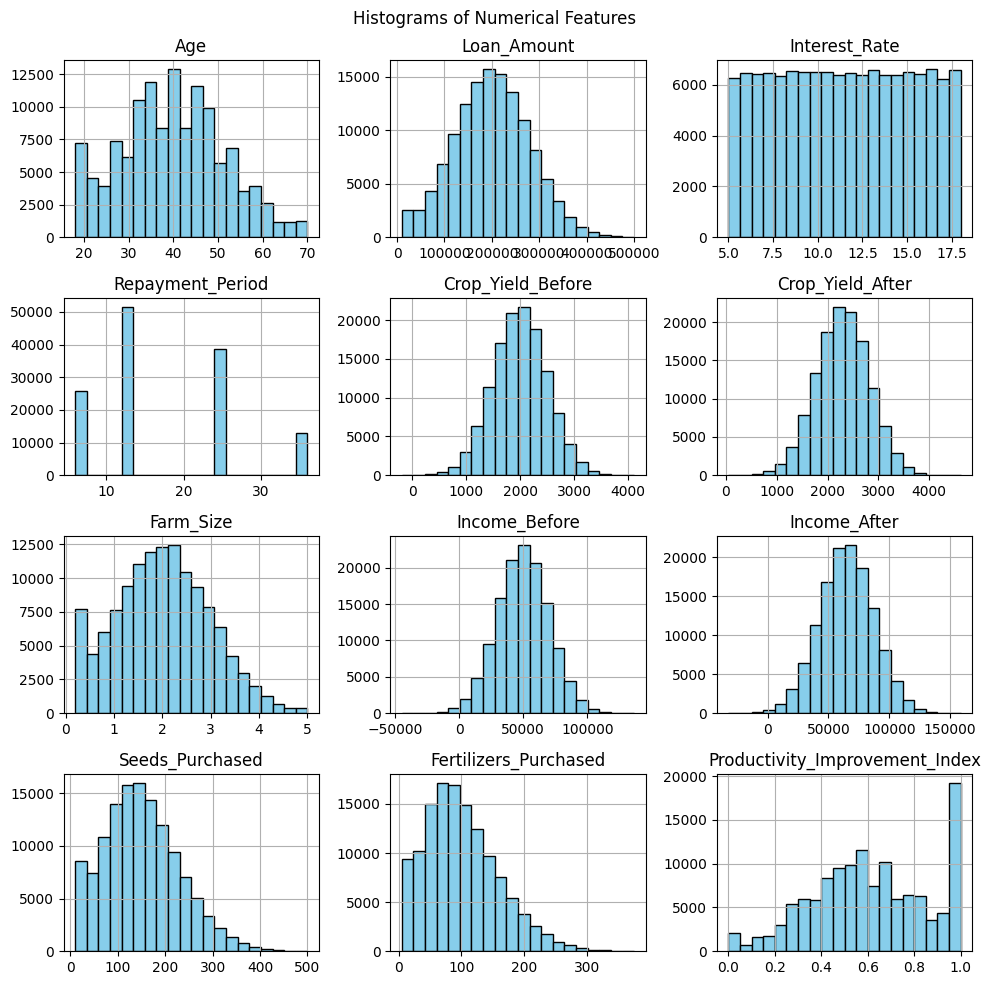

In [ ]:
# Histogram of numerical features using seaborn
df.hist(figsize=(10, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()


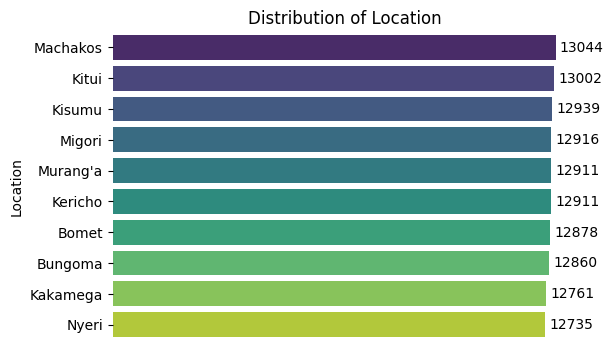

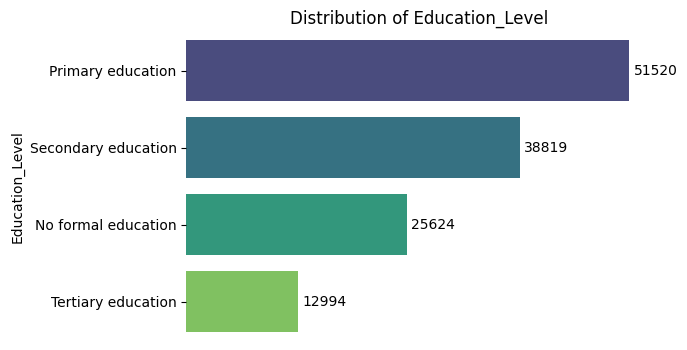

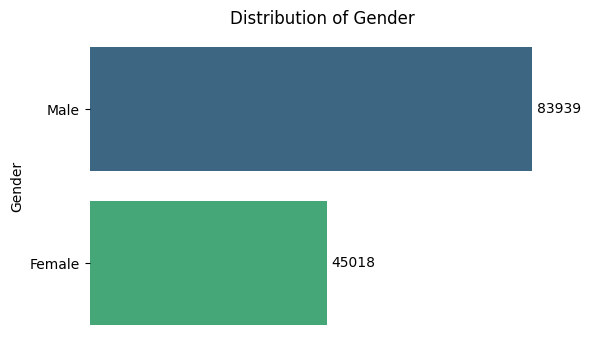

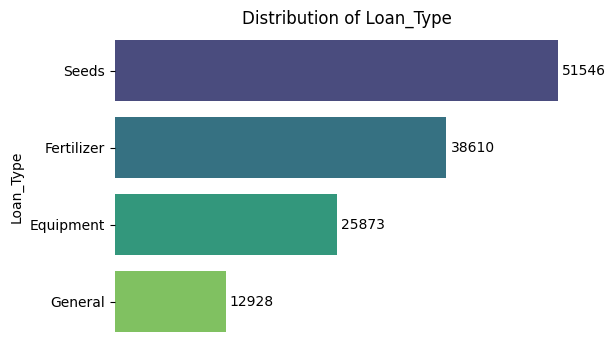

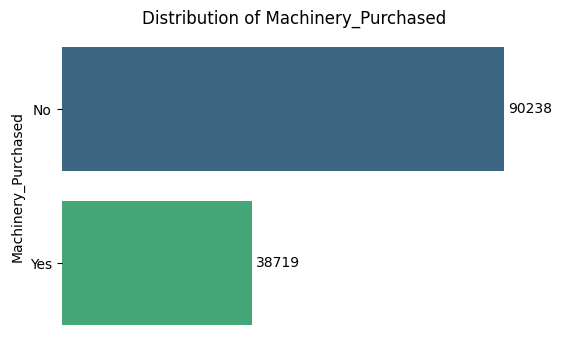

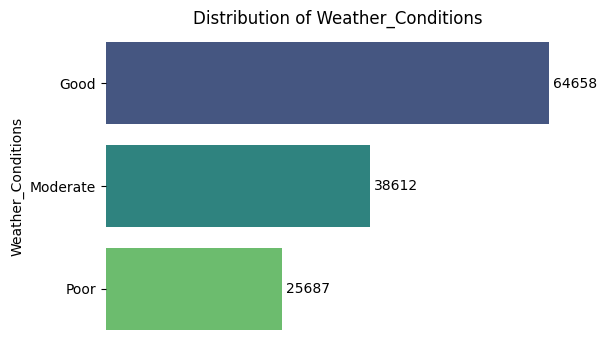

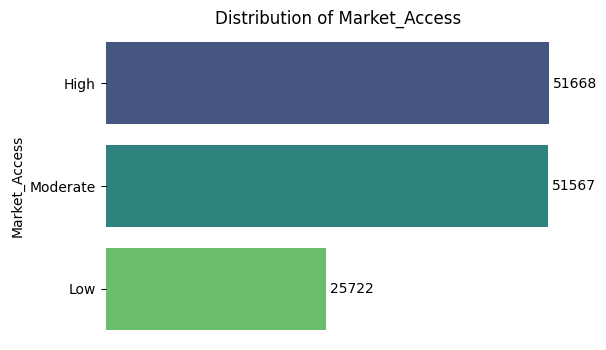

In [ ]:
# Bar plot for categorical variables sorted in descending order with count annotations
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))  # Adjust figure size
    ax = sns.countplot(y=col, data=df, palette='viridis',
                        order=df[col].value_counts().index)  # Sort in descending order

    # Add data values (count) on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    # Remove chart border
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.title(f'Distribution of {col}')
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel(col)  # Keep y-axis label
    plt.xticks([])  # Hide x-axis values
    plt.show()

# **Bivariate Analysis**

##**Credit Impact Analysis**

## Economic Impact

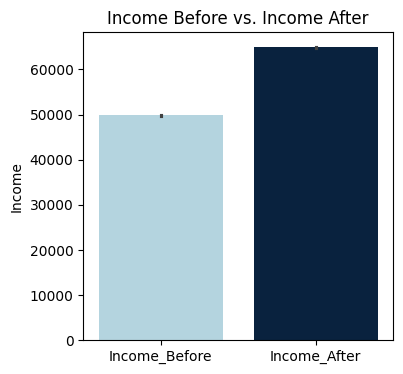

In [ ]:
# Compare imcome before and income after using bar plot
plt.figure(figsize=(4,4))
sns.barplot(data=df[['Income_Before', 'Income_After']], palette=["#ADD8E6", "#002147"])

plt.title("Income Before vs. Income After")
plt.ylabel("Income")
plt.show()

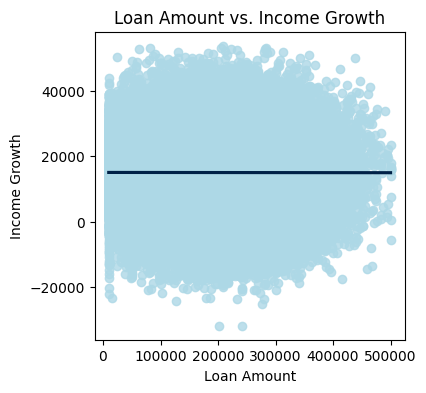

In [ ]:
# Relationship between loan amount and income growth

# Create a column for income growth
df['Income_Growth'] = df['Income_After'] - df['Income_Before']

# Scatter plot with trend line for loan amount vs income growth
plt.figure(figsize=(4,4))
sns.regplot(x='Loan_Amount', y='Income_Growth', data=df, scatter_kws={'color':
                                                                      '#ADD8E6'},
            line_kws={'color': '#002147'})

plt.title("Loan Amount vs. Income Growth")
plt.xlabel("Loan Amount")
plt.ylabel("Income Growth")
plt.show()

In [ ]:
# Pearson and Spearman correlation
pearson_corr = df["Loan_Amount"].corr(df["Income_Growth"], method="pearson")
spearman_corr = df["Loan_Amount"].corr(df["Income_Growth"], method="spearman")

# Output the correlation results
print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: -0.0013280177431059114
Spearman Correlation: -0.0011371871842842422


A correlation analysis was conducted to assess the relationship between loan amount and income growth. Pearson correlation and Spearman correlation were both computed. The results indicate a weak or negligible correlation between loan amount and income growth, as observed in the scatter plot. This suggests that loan amount alone does not significantly influence income growth, implying that other factors may play a more critical role.

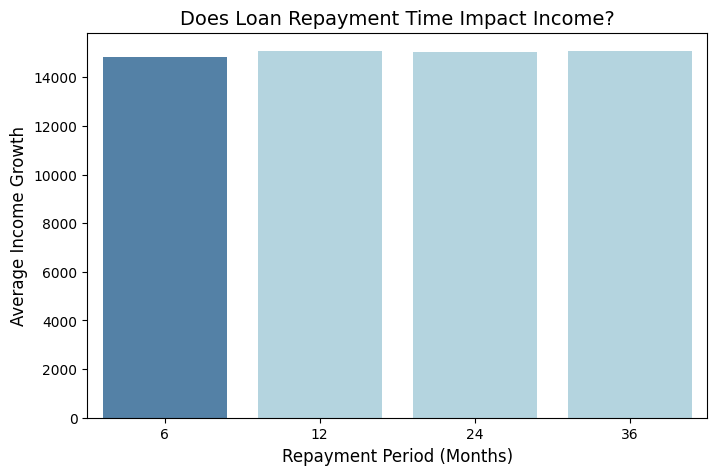

In [ ]:
# Does Loan Repayment Time Impact Income?

# Calculate Mean Income Growth per Repayment Period
df_avg = df.groupby("Repayment_Period")["Income_Growth"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avg, x="Repayment_Period", y="Income_Growth", palette= ["#4682B4", "#ADD8E6", "#ADD8E6", "#ADD8E6"])
plt.title("Does Loan Repayment Time Impact Income?", fontsize=14)
plt.xlabel("Repayment Period (Months)", fontsize=12)
plt.ylabel("Average Income Growth", fontsize=12)
plt.show()

In [ ]:
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Group data by repayment period
group_6 = df[df['Repayment_Period'] == 6]['Income_Growth']
group_12 = df[df['Repayment_Period'] == 12]['Income_Growth']
group_24 = df[df['Repayment_Period'] == 24]['Income_Growth']
group_36 = df[df['Repayment_Period'] == 36]['Income_Growth']

# Check Normality for ANOVA using Shapiro-Wilk test
_, p_normality = stats.shapiro(df['Income_Growth'])
print(f"shapiro p-value: {p_normality:.4f}")

# Perform ANOVA test
f_stat, p_anova = f_oneway(group_6, group_12, group_24, group_36)
print(f"anova p-value: {p_anova:.4f})")

# Perform Tukey's HSD test for pairwise comparisons
tukey = pairwise_tukeyhsd(df['Income_Growth'], df['Repayment_Period'])
print("\nTukey’s HSD Test Results:\n", tukey)

shapiro p-value: 0.7984
anova p-value: 0.0239)

Tukey’s HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     6     12 220.4384 0.0206   23.9766 416.9002   True
     6     24 192.1849 0.0798  -14.7771 399.1469  False
     6     36 234.7408 0.1301  -42.4871 511.9687  False
    12     24 -28.2535 0.9751 -201.1983 144.6913  False
    12     36  14.3024 0.9989 -238.5452 267.1501  False
    24     36  42.5559 0.9753  -218.534 303.6459  False
-------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 128957.
  res = hypotest_fun_out(*samples, **kwds)


To statistically test these differences, a one-way ANOVA (F-test) was conducted since the data met normality assumptions for large samples. The ANOVA results (p-value = 0.02394) indicated a significant difference in income growth across repayment periods.

Post-hoc analysis using Tukey’s HSD test revealed that the 12-month repayment period resulted in significantly higher income growth compared to the 6-month period (p = 0.0206).

However, no significant differences were found between other repayment periods, suggesting that extending the repayment period beyond 12 months does not necessarily lead to higher financial gains.


## Impact on Agricultural Productivity

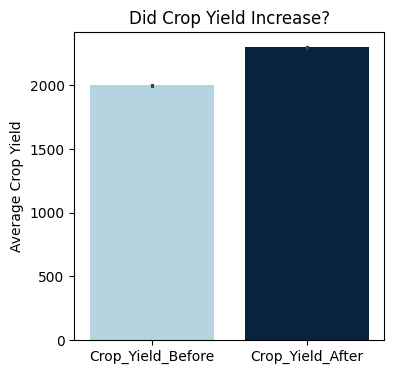

In [ ]:
# Compare crop yield before and after using bar plot
plt.figure(figsize=(4,4))
sns.barplot(data=df[['Crop_Yield_Before', 'Crop_Yield_After']], palette=["#ADD8E6", "#002147"])
plt.title("Did Crop Yield Increase?")
plt.ylabel("Average Crop Yield")
plt.show()

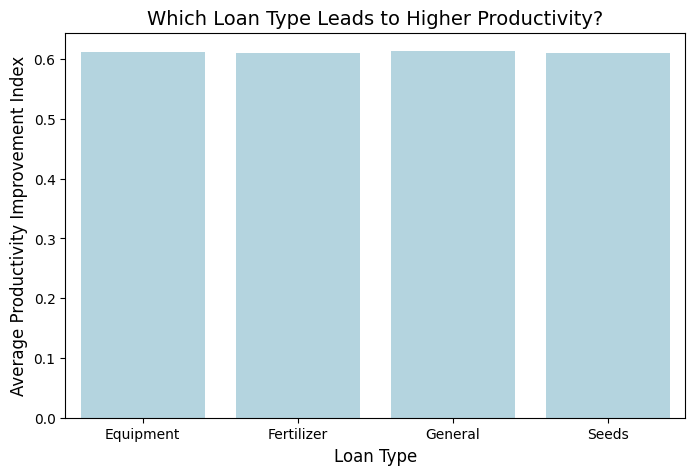

In [ ]:
# Calculate Average Productivity Improvement per Loan Type
df_avg = df.groupby("Loan_Type")["Productivity_Improvement_Index"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avg, x="Loan_Type", y="Productivity_Improvement_Index",
            palette=["#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6"])
plt.title("Which Loan Type Leads to Higher Productivity?", fontsize=14)
plt.xlabel("Loan Type", fontsize=12)
plt.ylabel("Average Productivity Improvement Index", fontsize=12)
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA
model = ols('Productivity_Improvement_Index ~ C(Loan_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df         F    PR(>F)
C(Loan_Type)     0.121931       3.0  0.635303  0.592165
Residual      8249.780563  128953.0       NaN       NaN


One-way ANOVA (F-test) was conducted to determine if these differences are statistically significant.

ANOVA Results: F-statistic = 0.6353, p-value = 0.5922.

Since the p-value (p > 0.05), we fail to reject the null hypothesis, indicating no significant difference in productivity improvement across loan types.
This suggests that Loan Type does not have a statistically significant impact on productivity improvement, implying that other factors may be influencing productivity outcomes.

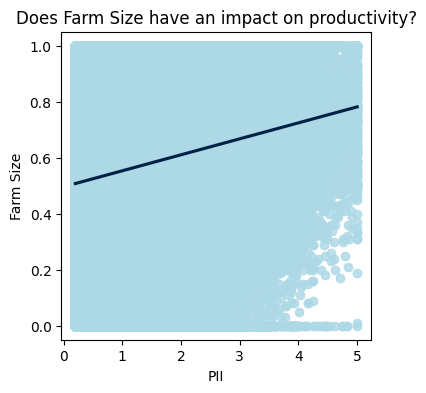

In [ ]:
# Relationship between farm size and PII
plt.figure(figsize=(4,4))
sns.regplot(x='Farm_Size', y='Productivity_Improvement_Index', data=df,
            scatter_kws={'color': '#ADD8E6'}, line_kws={'color': '#002147'})
plt.title("Does Farm Size have an impact on productivity?")
plt.xlabel("PII")
plt.ylabel("Farm Size")
plt.show()

In [ ]:
# Pearson and Spearman correlation coefficients
pearson_corr, pearson_p = stats.pearsonr(df['Farm_Size'],
                                         df['Productivity_Improvement_Index'])
print(f"Pearson Correlation: {pearson_corr:.4f}")

Pearson Correlation: 0.2188


**Insight:**  
The scatter plot shows the relationship between **Farm Size** and **Productivity Improvement Index (PII)**, with a slight positive trend.  

- **Pearson Correlation:** **0.2188**, p-value **< 0.0001** (statistically significant).  
- **Spearman Correlation:** **0.2195**, p-value **< 0.0001** (statistically significant).  

Both correlation tests indicate a **weak but significant positive relationship** between Farm Size and PII, suggesting that larger farms tend to have slightly higher productivity improvements. However, the low correlation values imply that other factors may have a stronger influence on PII.

## Loan Accessiblity Across Demographics

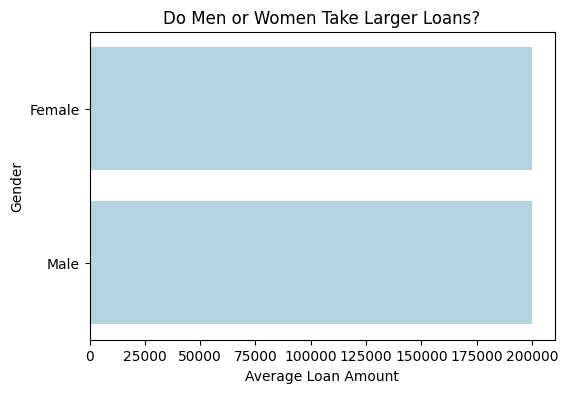

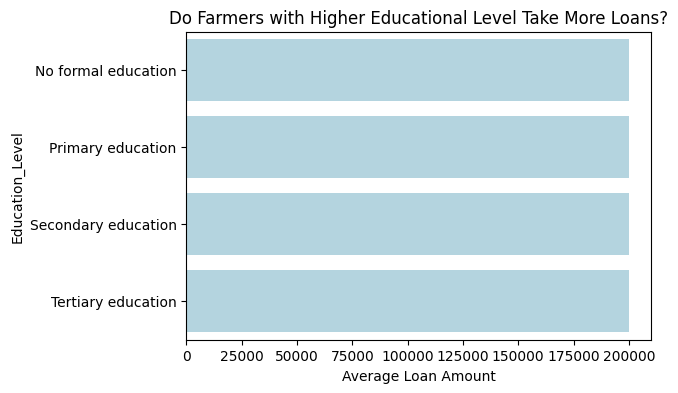

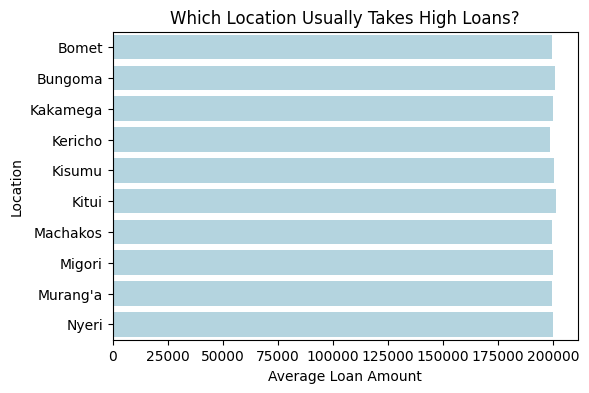

In [ ]:
# Compute Averages

# Group by Gender
df_avg_loan_gender = df.groupby("Gender")["Loan_Amount"].mean().reset_index()

# Group by Education Level
df_avg_loan_education = df.groupby("Education_Level")["Loan_Amount"].mean().reset_index()

# Group by Location
df_avg_loan_location = df.groupby("Location")["Loan_Amount"].mean().reset_index()


# Plot Loan Amount by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_loan_gender, y="Gender", x="Loan_Amount", color="#ADD8E6")
plt.title("Do Men or Women Take Larger Loans?")
plt.xlabel("Average Loan Amount")

plt.show()

# Plot Loan Amount by Educational Level
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_loan_education, y="Education_Level", x="Loan_Amount", color="#ADD8E6")
plt.title("Do Farmers with Higher Educational Level Take More Loans?")
plt.xlabel("Average Loan Amount")
plt.show()

# Plot Loan Amount by Location
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_loan_location, y="Location", x="Loan_Amount", color="#ADD8E6")
plt.title("Which Location Usually Takes High Loans?")
plt.xlabel("Average Loan Amount")
plt.show()

# **Identifying Barriers to Credit Access**

## Loan Repayment Challenges

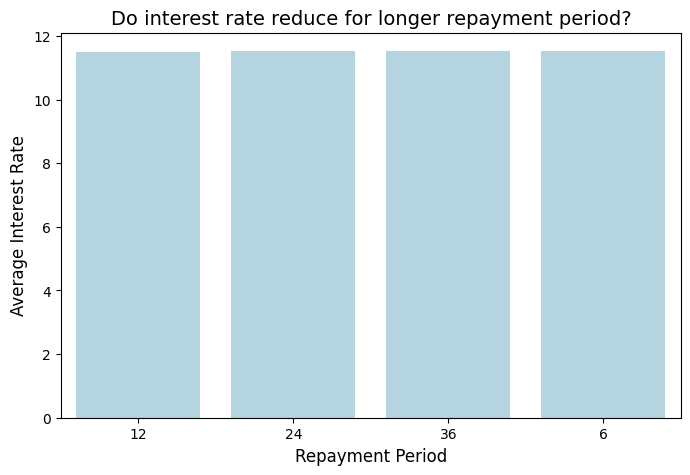

In [ ]:
df["Repayment_Period"] = df['Repayment_Period'].astype(str)
# Calculate Average Productivity Improvement per Loan Type
df_avg = df.groupby("Repayment_Period")["Interest_Rate"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avg, y="Interest_Rate", x="Repayment_Period",
            palette=["#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6"])

# Adding labels & title
plt.title("Do interest rate reduce for longer repayment period?", fontsize=14)
plt.xlabel("Repayment Period", fontsize=12)
plt.ylabel("Average Interest Rate", fontsize=12)
plt.show()

## Market & Environmental Constraints

**Assess how Weather Conditions impact Yield & Income Growth.**

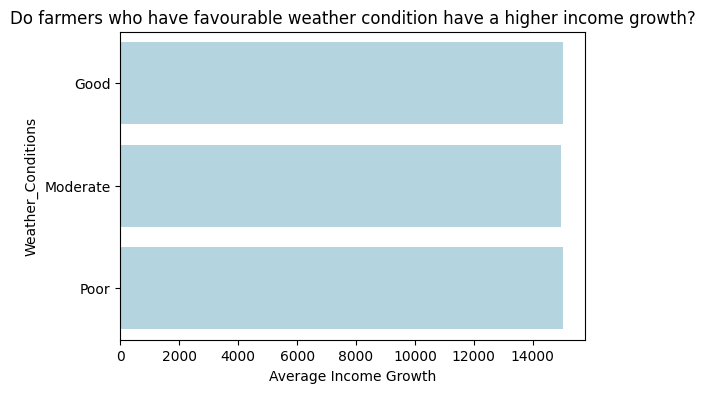

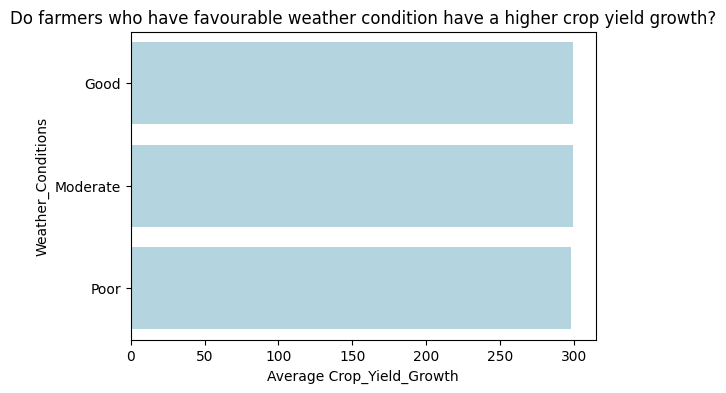

In [ ]:
# Compute Averages

# Group income growth by weather comditions
df_avg_income_growth = df.groupby("Weather_Conditions")["Income_Growth"].mean().reset_index()

# Group crop yield by weather conditions
df['Crop_Yield_Growth'] = df['Crop_Yield_After'] - df['Crop_Yield_Before']
df_avg_crop_yield = df.groupby("Weather_Conditions")["Crop_Yield_Growth"].mean().reset_index()


# Plot Loan Amount by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_income_growth, y="Weather_Conditions", x="Income_Growth", color="#ADD8E6")
plt.title("Do farmers who have favourable weather condition have a higher income growth?")
plt.xlabel("Average Income Growth")
plt.show()

# Plot Loan Amount by Educational Level
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_crop_yield, y="Weather_Conditions", x="Crop_Yield_Growth", color="#ADD8E6")
plt.title("Do farmers who have favourable weather condition have a higher crop yield growth?")
plt.xlabel("Average Crop_Yield_Growth")
plt.show()

Weather conditions do not appear to drastically affect average crop yield growth or income growth.


**Examine if Market Access Levels (Low, Moderate, High) affect farmers’ ability to generate income.**

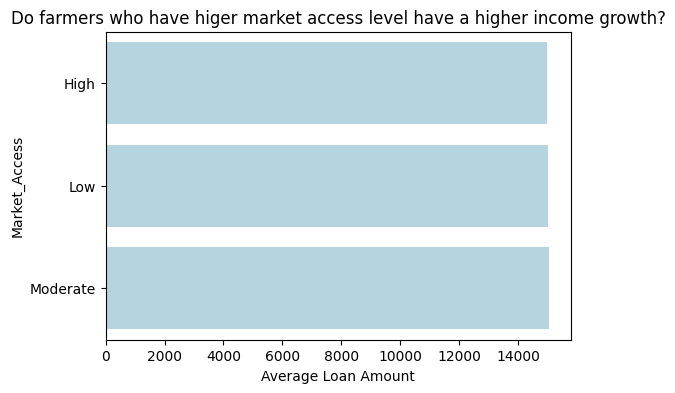

In [ ]:
# Group income growth by weather comditions and compute the mean
df_avg_income_growth_ML = df.groupby("Market_Access")["Income_Growth"].mean().reset_index()

# Plot Income Growth by Market Level
plt.figure(figsize=(6, 4))
sns.barplot(data=df_avg_income_growth_ML, y="Market_Access", x="Income_Growth", color="#ADD8E6")
plt.title("Do farmers who have higer market access level have a higher income growth?")
plt.xlabel("Average Income Growth")
plt.show()


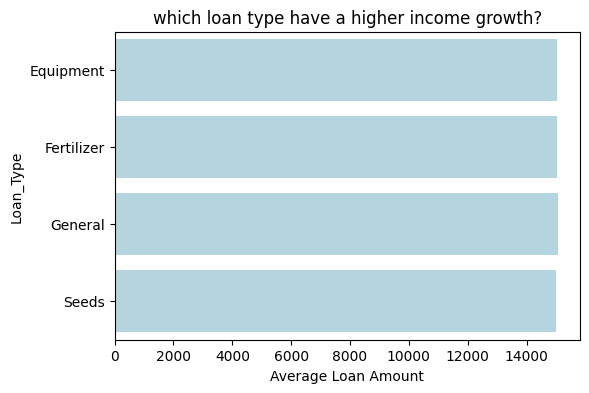

In [ ]:
# Group by loan type and compute the mean
avg_income_growth_LP = df.groupby("Loan_Type")["Income_Growth"].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_income_growth_LP, y="Loan_Type", x="Income_Growth", color="#ADD8E6")
plt.title("which loan type have a higher income growth?")
plt.xlabel("Average Income Growth")
plt.show()

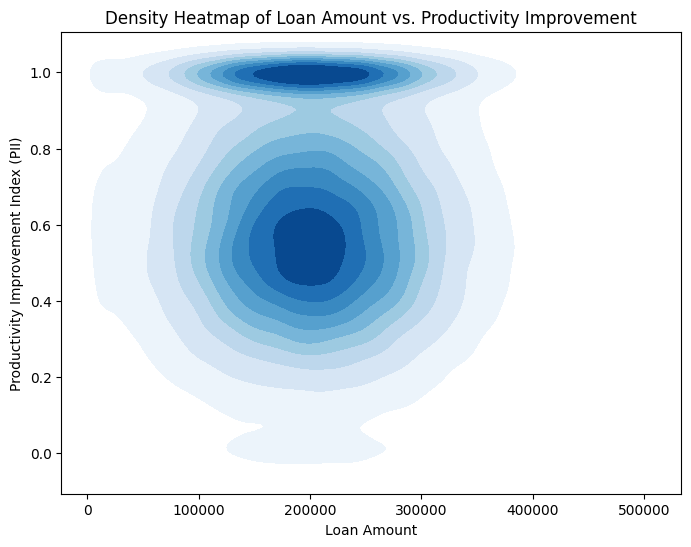

In [ ]:
# Density heat map of loan amount vs PII
plt.figure(figsize=(8,6))
sns.kdeplot(x=df["Loan_Amount"], y=df["Productivity_Improvement_Index"],
            cmap="Blues", fill=True)
plt.title("Density Heatmap of Loan Amount vs. Productivity Improvement")
plt.xlabel("Loan Amount")
plt.ylabel("Productivity Improvement Index (PII)")
plt.show()

The density heatmap shows the concentration of data points in the relationship between Loan Amount and Productivity Improvement Index (PII). The darkest regions indicate the highest density of observations, suggesting that most borrowers received loan amounts around ₦200,000, with moderate to high productivity improvement (PII between 0.6 and 1.0). The distribution also suggests that very high loan amounts are less frequent, and their impact on productivity improvement is more dispersed. This pattern implies that while loan amounts may influence productivity improvement, the relationship is not strictly linear.

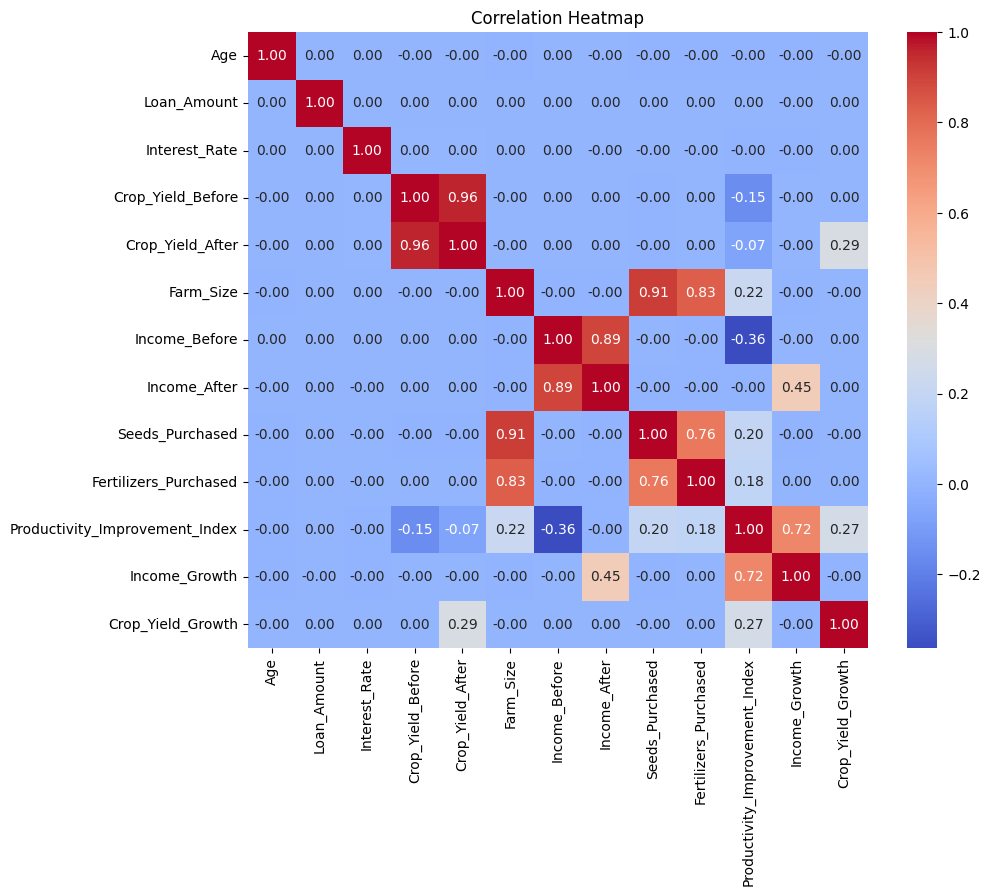

In [ ]:
# correlation heat map for numerical catergories
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 The correlation heatmap reveals key factors influencing **Productivity Improvement Index (PII)**. Income growth (**r = 0.72**) and fertilizers purchased (**r = 0.27**) show the strongest positive correlations with productivity improvement, suggesting that increased earnings and fertilizer use significantly enhance productivity. Additionally, crop yield growth (**r = 0.27**) and farm size (**r = 0.22**) also contribute positively.

However, crop yield before intervention (**r = -0.36**) and age (**r = -0.15**) show negative correlations, indicating that initial low yield and younger farmers may experience greater productivity improvements. These insights can help optimize strategies for improving agricultural productivity.

# Key Performance Indicator

## Farmer Demographics KPIs

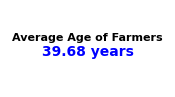

In [ ]:
# Average Age of Farmers
avg_age = df['Age'].mean()
fig, ax = plt.subplots(figsize=(2, 1))
ax.axis("off")
ax.text(0.5, 0.6, "Average Age of Farmers", fontsize=8, fontweight="bold", ha="center")
ax.text(0.5, 0.4, f"{avg_age:.2f} years", fontsize=10, fontweight="bold", ha="center", color="blue")
plt.show()

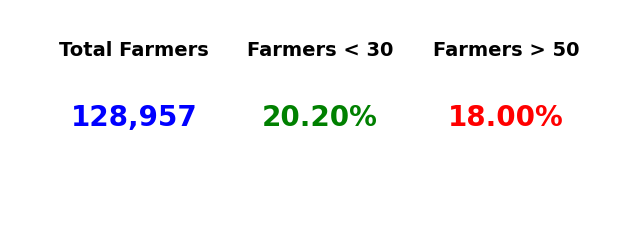

In [ ]:
# Percentage of Farmers below 30 and above 50
total_farmers = len(df)
below_30 = len(df[df['Age'] < 30])
above_50 = len(df[df['Age'] > 50])

# Calculate percentages
below_30_pct = (below_30 / total_farmers) * 100
above_50_pct = (above_50 / total_farmers) * 100

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")

# KPI Card Titles
ax.text(0.2, 0.8, "Total Farmers", fontsize=14, fontweight="bold", ha="center")
ax.text(0.5, 0.8, "Farmers < 30", fontsize=14, fontweight="bold", ha="center")
ax.text(0.8, 0.8, "Farmers > 50", fontsize=14, fontweight="bold", ha="center")

# KPI Values
ax.text(0.2, 0.5, f"{total_farmers:,}", fontsize=20, fontweight="bold", ha="center", color="blue")
ax.text(0.5, 0.5, f"{below_30_pct:.2f}%", fontsize=20, fontweight="bold", ha="center", color="green")
ax.text(0.8, 0.5, f"{above_50_pct:.2f}%", fontsize=20, fontweight="bold", ha="center", color="red")

# Show Plot
plt.show()


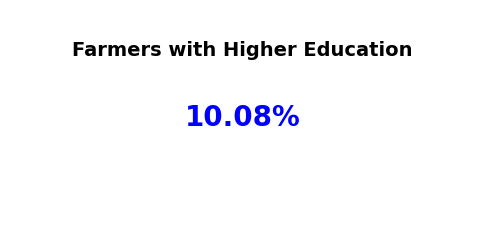

In [ ]:
# Percentage of Farmers with Higher Education
total_farmers = len(df)
higher_edu_farmers = len(df[df['Education_Level'] == 'Tertiary education'])

# Calculate percentage
higher_edu_pct = (higher_edu_farmers / total_farmers) * 100

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.8, "Farmers with Higher Education", fontsize=14, fontweight="bold", ha="center")

# KPI Values
ax.text(0.5, 0.5, f"{higher_edu_pct:.2f}%", fontsize=20, fontweight="bold", ha="center", color="blue")

# Show Plot
plt.show()


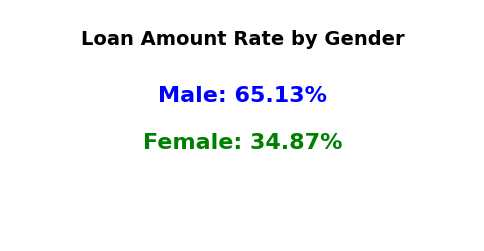

In [ ]:
# Loan access rate by gender
total_loan = df['Loan_Amount'].sum()

# Loan amount per gender
loan_by_gender = df.groupby('Gender')['Loan_Amount'].sum()

# Calculate loan percentage by gender
loan_male_pct = (loan_by_gender.get('Male', 0) / total_loan) * 100
loan_female_pct = (loan_by_gender.get('Female', 0) / total_loan) * 100

# Create KPI Card using Matplotlib
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.85, "Loan Amount Rate by Gender", fontsize=14, fontweight="bold", ha="center")

# KPI Values
ax.text(0.5, 0.6, f"Male: {loan_male_pct:.2f}%", fontsize=16, fontweight="bold", ha="center", color="blue")
ax.text(0.5, 0.4, f"Female: {loan_female_pct:.2f}%", fontsize=16, fontweight="bold", ha="center", color="green")

# Show Plot
plt.show()


## Loan Characteristics KPIs

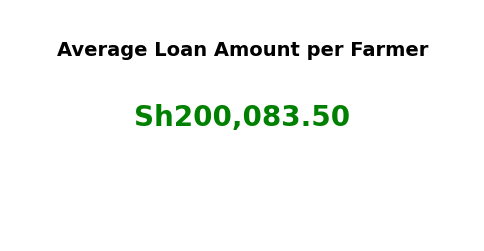

In [ ]:
# Calculate Average Loan Amount Per Farmer

avg_loan_amount = df['Loan_Amount'].mean()

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.8, "Average Loan Amount per Farmer", fontsize=14, fontweight="bold", ha="center")

# KPI Value
ax.text(0.5, 0.5, f"Sh{avg_loan_amount:,.2f}", fontsize=20, fontweight="bold", ha="center", color="green")

# Show Plot
plt.show()


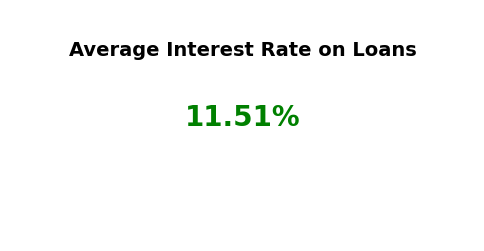

In [ ]:
# Calculate Average Interest Rate on Loans

avg_interest = df['Interest_Rate'].mean()

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.8, "Average Interest Rate on Loans", fontsize=14, fontweight="bold", ha="center")

# KPI Value
ax.text(0.5, 0.5, f"{avg_interest:,.2f}%", fontsize=20, fontweight="bold", ha="center", color="green")

# Show Plot
plt.show()


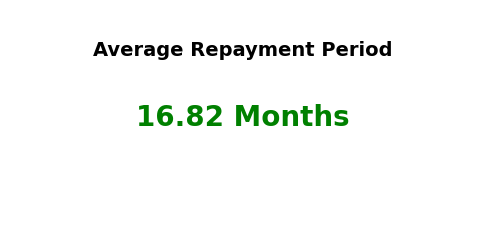

In [ ]:
# Calculate Average Repayment Period

avg_repayment = df['Repayment_Period'].mean()

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.8, "Average Repayment Period", fontsize=14, fontweight="bold", ha="center")

# KPI Value
ax.text(0.5, 0.5, f"{avg_repayment:,.2f} Months", fontsize=20, fontweight="bold", ha="center", color="green")

# Show Plot
plt.show()


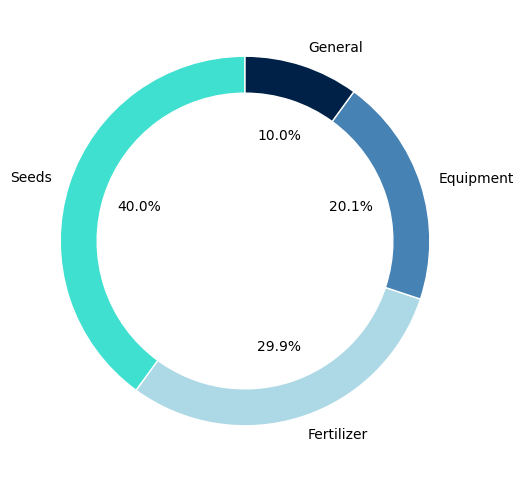

In [ ]:
import matplotlib.pyplot as plt

# donut chart of loan type
loan_type_counts = df['Loan_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(loan_type_counts, labels=loan_type_counts.index,
        colors = ['#40E0D0', '#ADD8E6', '#4682B4', '#002147'],
        autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.2, 'edgecolor': 'white'})
plt.show()

## Productivity Metrics KPIs

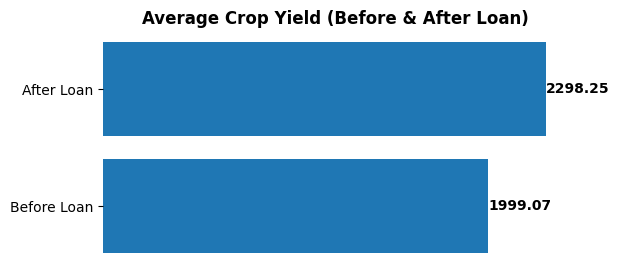

In [ ]:
# Averegae crop yield before and after loan
avg_yield_before = df['Crop_Yield_Before'].mean()
avg_yield_after = df['Crop_Yield_After'].mean()

# Data for plotting
categories = ["Before Loan", "After Loan"]
values = [avg_yield_before, avg_yield_after]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(categories, values)

# Add labels
for index, value in enumerate(values):
    ax.text(value, index, f"{value:.2f}", va='center', fontsize=10, fontweight='bold')

# Title
ax.set_title("Average Crop Yield (Before & After Loan)", fontsize=12, fontweight="bold")

# Remove x-axis values
ax.set_xticks([])

# Remove chart borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Show plot
plt.show()


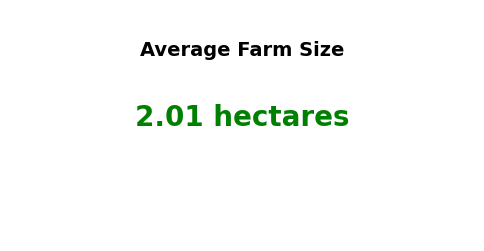

In [ ]:
# Calculate the average farm size
avg_farm_size = df['Farm_Size'].mean()

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

# KPI Card Title
ax.text(0.5, 0.8, "Average Farm Size", fontsize=14, fontweight="bold", ha="center")

# KPI Value
ax.text(0.5, 0.5, f"{avg_farm_size:.2f} hectares", fontsize=20, fontweight="bold", ha="center", color="green")

# Show Plot
plt.show()


## Agricultural Inputs KPIs

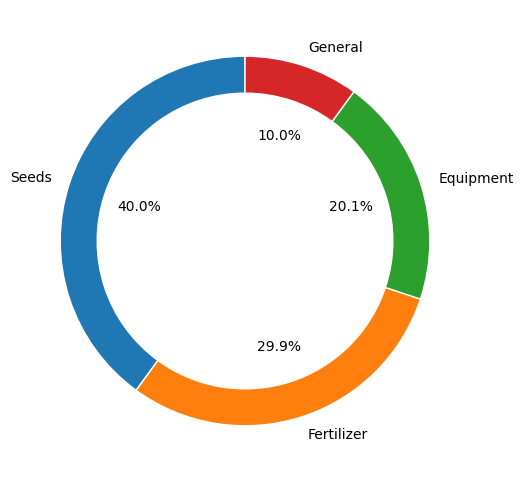

In [ ]:
# donut chart of loan type
loan_type_counts = df['Loan_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.2, 'edgecolor': 'white'})
plt.show()

## External Factors KPIs

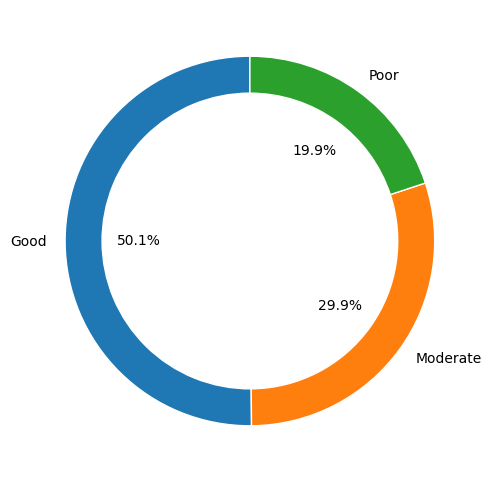

In [ ]:
# donut chart for weather conditions
weather_counts = df['Weather_Conditions'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.2, 'edgecolor': 'white'})
plt.show()

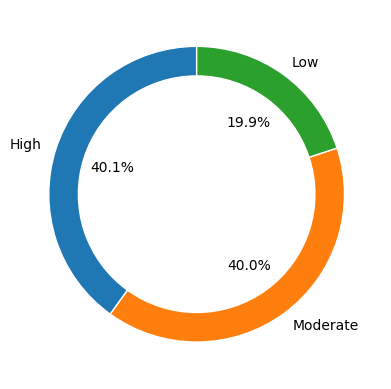

In [ ]:
# Donut chart for market access
market_access_counts = df['Market_Access'].value_counts()
plt.pie(market_access_counts, labels=market_access_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.2, 'edgecolor': 'white'})
plt.show()

# **Predictive Analysis**

Encode categorical variables

In [ ]:
# One_Hot Encoding for Norminal data
df = pd.get_dummies(df, columns=['Gender', 'Location', 'Loan_Type', 'Machinery_Purchased'])

# Label Encoding for Ordinal data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Weather_Conditions'] = le.fit_transform(df['Weather_Conditions'])
df['Market_Access'] = le.fit_transform(df['Market_Access'])

Scale numeric columns

In [ ]:
# standard scale all the numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of numeric columns
numeric_cols = ['Age', 'Income_Before', 'Seeds_Purchased', 'Fertilizers_Purchased',
                'Crop_Yield_Growth', 'Income_Growth', 'Loan_Amount', 'Interest_Rate',
                'Repayment_Period', 'Income_After', 'Crop_Yield_Before', 'Crop_Yield_After',
                'Farm_Size', 'Productivity_Improvement_Index']

# Check which columns exist in df
existing_cols = [col for col in numeric_cols if col in df.columns]

# Apply StandardScaler only to existing columns
df[existing_cols] = scaler.fit_transform(df[existing_cols])

Check for the skewness of the data

In [ ]:
from scipy.stats import skew

print(f"Skewness of Income After: {skew(df['Income_After']):.4f}")

Skewness of Income After: -0.0023


The skewness is close to zero which means it is approximaetly normal

**Income_After Model**

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Income_After', 'Crop_Yield_After', 'Crop_Yield_Growth', 'Income_Growth', 'Productivity_Improvement_Index'])
y = df["Income_After"]

In [ ]:
# Train-Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.2003
Mean Absolute Error (MAE): 0.3568
R² Score: 0.8001


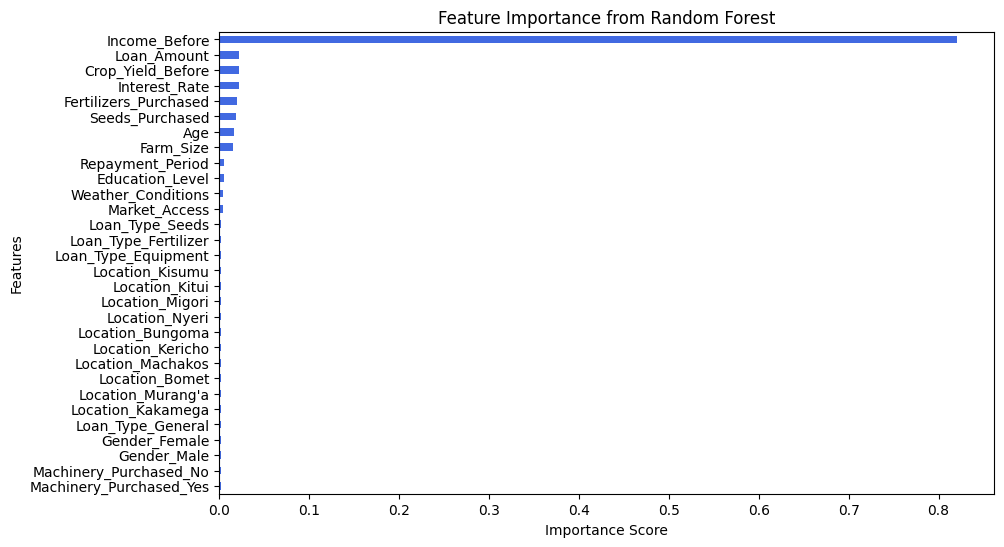

Top 5 Most Important Features:
 Income_Before            0.821032
Loan_Amount              0.021604
Crop_Yield_Before        0.021564
Interest_Rate            0.021420
Fertilizers_Purchased    0.019459
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Feature Importance
feature_importance = rf_model.feature_importances_

# Convert to Pandas Series for easy visualization
importance_df = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importance_df.sort_values().plot(kind="barh", color="royalblue")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print top features
print("Top 5 Most Important Features:\n", importance_df.head())


In [ ]:
# Select only the most important feature
X_train_best = X_train[["Income_Before"]]
X_test_best = X_test[["Income_Before"]]

# Train a new Random Forest model
rf_model_best = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_best.fit(X_train_best, y_train)

# Make predictions
y_pred_best = rf_model_best.predict(X_test_best)

# Evaluate Performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R² Score with 1 Feature:", r2_score(y_test, y_pred_best))
print("MSE with 1 Feature:", mean_squared_error(y_test, y_pred_best))
print("MAE with 1 Feature:", mean_absolute_error(y_test, y_pred_best))

R² Score with 1 Feature: 0.7219936194099269
MSE with 1 Feature: 0.2785549659756745
MAE with 1 Feature: 0.4212080906689671


In [ ]:
# Train Linear Regression on the single feature
lr_model = LinearRegression()
lr_model.fit(X_train_best, y_train)  # Using only "Income_Before"

# Predictions
y_pred_lr = lr_model.predict(X_test_best)

# Evaluate Performance
r2_lin = r2_score(y_test, y_pred_lr)
mse_lin = mean_squared_error(y_test, y_pred_lr)
mae_lin = mean_absolute_error(y_test, y_pred_lr)

print("R² Score (Linear Regression):", r2_lin)
print("MSE (Linear Regression):", mse_lin)
print("MAE (Linear Regression):", mae_lin)


R² Score (Linear Regression): 0.8001385506879897
MSE (Linear Regression): 0.2002558325992031
MAE (Linear Regression): 0.3568175366951387


In [ ]:
import scipy.stats as st

# Get predictions
y_pred_lr = lr_model.predict(X_test_best)

# Compute residuals (errors)
residuals = y_test - y_pred_lr
stderr = np.std(residuals)

# Compute confidence interval (95% = alpha 0.05)
confidence = 0.95
t_value = st.t.ppf((1 + confidence) / 2, len(y_test) - 1)  # t-score
margin_of_error = t_value * stderr  # Compute margin of error

# Compute upper and lower bounds
y_upper = y_pred_lr + margin_of_error
y_lower = y_pred_lr - margin_of_error

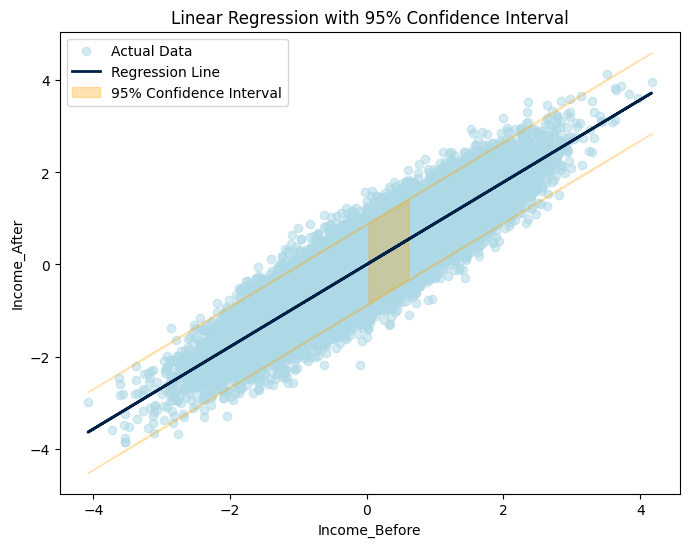

In [ ]:
# Plot scatter + regression line + confidence interval
plt.figure(figsize=(8, 6))
plt.scatter(X_test_best, y_test, color="#ADD8E6", alpha=0.5, label="Actual Data")
plt.plot(X_test_best, y_pred_lr, color="#002147", linewidth=2, label="Regression Line")
plt.fill_between(X_test_best.squeeze(), y_lower, y_upper, color="orange", alpha=0.3, label="95% Confidence Interval")
plt.xlabel("Income_Before")
plt.ylabel("Income_After")
plt.title("Linear Regression with 95% Confidence Interval")
plt.legend()
plt.show()

**Crop Yield After Model**

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Income_After', 'Crop_Yield_After', 'Crop_Yield_Growth', 'Income_Growth', 'Productivity_Improvement_Index'])
y = df["Crop_Yield_After"]

In [ ]:
# Train-Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
# Predictions
y_pred2 = model.predict(X_test2)

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.2003
Mean Absolute Error (MAE): 0.3568
R² Score: 0.8001


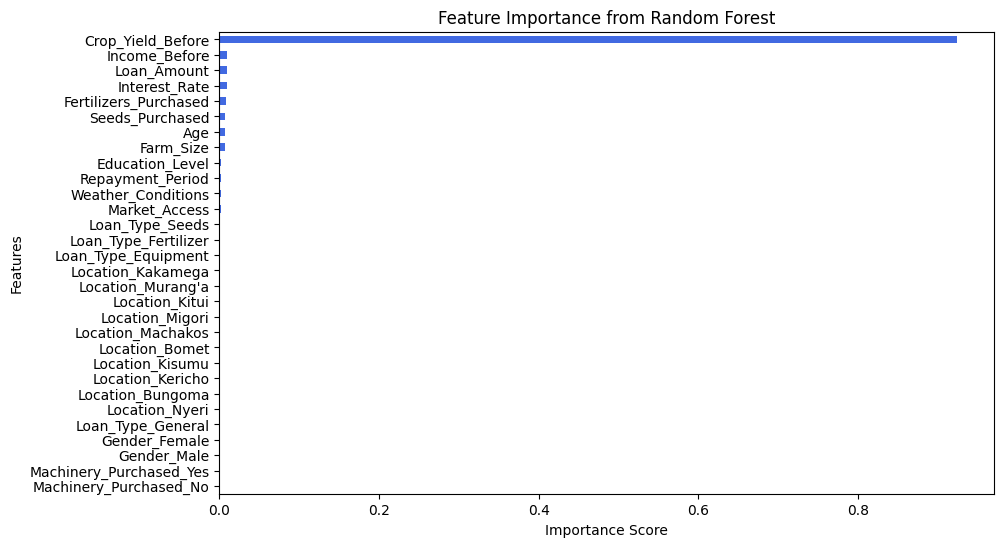

Top 5 Most Important Features:
 Crop_Yield_Before        0.924618
Income_Before            0.009227
Loan_Amount              0.009167
Interest_Rate            0.009105
Fertilizers_Purchased    0.007979
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)

# Get Feature Importance
feature_importance_2 = rf_model.feature_importances_

# Convert to Pandas Series for easy visualization
importance_df_2 = pd.Series(feature_importance_2, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importance_df_2.sort_values().plot(kind="barh", color="royalblue")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print top features
print("Top 5 Most Important Features:\n", importance_df_2.head())


In [ ]:
# Select only the most important feature
X_train_best2 = X_train[["Crop_Yield_Before"]]
X_test_best2 = X_test[["Crop_Yield_Before"]]

# Train a new Random Forest model
rf_model_best2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_best.fit(X_train_best2, y_train2)

# Make predictions
y_pred_best2 = rf_model_best.predict(X_test_best2)

# Evaluate Performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R² Score with 1 Feature:", r2_score(y_test2, y_pred_best2))
print("MSE with 1 Feature:", mean_squared_error(y_test2, y_pred_best2))
print("MAE with 1 Feature:", mean_absolute_error(y_test2, y_pred_best2))

R² Score with 1 Feature: 0.9143963492522377
MSE with 1 Feature: 0.0850639869775273
MAE with 1 Feature: 0.23290929184077502


In [ ]:
# Train Linear Regression on the single feature
lr_model = LinearRegression()
lr_model.fit(X_train_best2, y_train2)  # Using only "Income_Before"

# Predictions
y_pred_lr2 = lr_model.predict(X_test_best2)

# Evaluate Performance
r2_lin2 = r2_score(y_test2, y_pred_lr2)
mse_lin2 = mean_squared_error(y_test2, y_pred_lr2)
mae_lin2 = mean_absolute_error(y_test2, y_pred_lr2)

print("R² Score (Linear Regression):", r2_lin2)
print("MSE (Linear Regression):", mse_lin2)
print("MAE (Linear Regression):", mae_lin2)

R² Score (Linear Regression): 0.9169940284750128
MSE (Linear Regression): 0.08248268408159086
MAE (Linear Regression): 0.22939484326444906


In [ ]:
import scipy.stats as st

# Get predictions
y_pred_lr2 = lr_model.predict(X_test_best2)

# Compute residuals (errors)
residuals2 = y_test2 - y_pred_lr2
stderr2 = np.std(residuals2)

# Compute confidence interval (95% = alpha 0.05)
confidence = 0.95
t_value2 = st.t.ppf((1 + confidence) / 2, len(y_test2) - 1)  # t-score
margin_of_error2 = t_value2 * stderr2  # Compute margin of error

# Compute upper and lower bounds
y_upper2 = y_pred_lr2 + margin_of_error2
y_lower2 = y_pred_lr2 - margin_of_error2

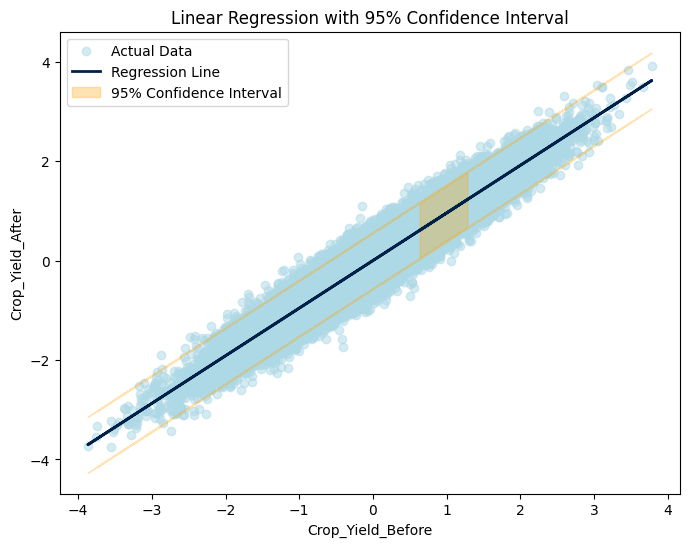

In [ ]:
# Plot scatter + regression line + confidence interval
plt.figure(figsize=(8, 6))
plt.scatter(X_test_best2, y_test2, color="#ADD8E6", alpha=0.5, label="Actual Data")
plt.plot(X_test_best2, y_pred_lr2, color="#002147", linewidth=2, label="Regression Line")
plt.fill_between(X_test_best2.squeeze(), y_lower2, y_upper2, color="orange", alpha=0.3, label="95% Confidence Interval")
plt.xlabel("Crop_Yield_Before")
plt.ylabel("Crop_Yield_After")
plt.title("Linear Regression with 95% Confidence Interval")
plt.legend()
plt.show()

# **For Presentation and Interpretation Purpose**

In [ ]:
# Linear Regression

from sklearn.metrics import r2_score

# Extract the raw data
X = df['Income_Before']
y = df['Income_After']

# Compute means
X_mean = X.mean()
y_mean = y.mean()

# Compute slope (m) and intercept (b)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
m = round((numerator / denominator),2)
b = round((y_mean - (m * X_mean)),2)

# Compute predictions
y_pred = m * X + b

# Calculate R-squared value
r1 = r2_score(y, y_pred)

In [ ]:
from scipy.stats import t
# Compute residuals
residuals = y - y_pred

# Standard error of the estimate (s_err)
n = len(X)
s_err = np.sqrt(np.sum(residuals**2) / (n - 2))

# t-value for 95% confidence interval
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, n - 2)

# Margin of error
margin_of_error = t_value * s_err

# Compute confidence interval
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

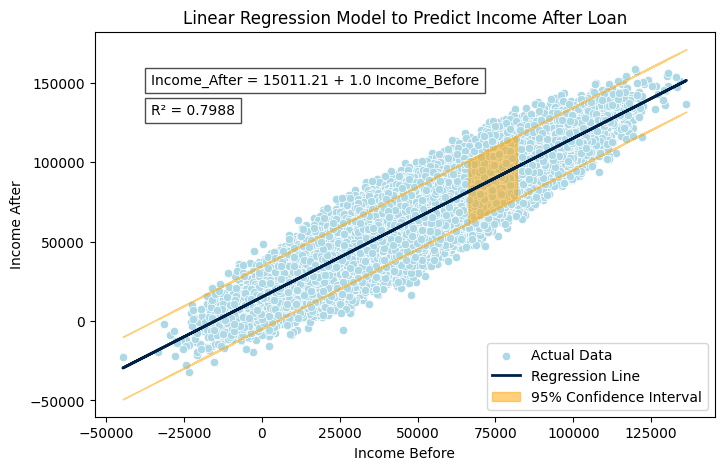

In [ ]:
# Plot the regression line with confidence interval
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=y, label="Actual Data", color="#ADD8E6")
plt.plot(X, y_pred, color="#002147", label="Regression Line", linewidth=2)
plt.fill_between(X, lower_bound, upper_bound, color="orange", alpha=0.5, label="95% Confidence Interval")

# Annotation for the equation
equation = f"Income_After = {b} + {m} Income_Before"
r1_text = f"R² = {r1:.4f}"

# Adjust text positions dynamically
x_pos = min(X) + (max(X) - min(X)) * 0.05  # Slightly right from the minimum X
y_pos_equation = max(y) - (max(y) - min(y)) * 0.05  # 10% from the top
y_pos_r2 = y_pos_equation - (max(y) - min(y)) * 0.1  # Position below equation

plt.text(x_pos, y_pos_equation, equation, fontsize=10, color="black",
         bbox=dict(facecolor="white", alpha=0.7))

plt.text(x_pos, y_pos_r2, r1_text, fontsize=10, color="black",
         bbox=dict(facecolor="white", alpha=0.7))

plt.xlabel("Income Before")
plt.ylabel("Income After")
plt.title("Linear Regression Model to Predict Income After Loan")
plt.legend()
plt.show()

# **Predictive Analysis (Crop Yield)**

Check for outliers in the target variable (Income After)

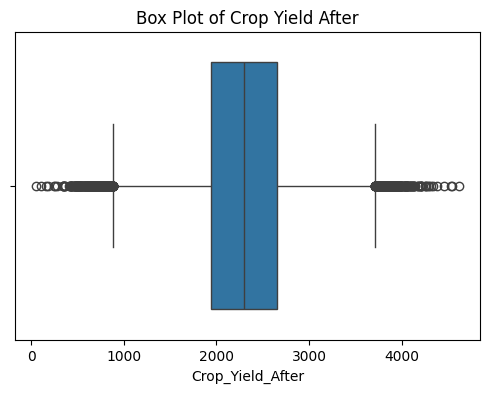

In [ ]:
# box plot of Crop Yield After
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Crop_Yield_After'])
plt.title('Box Plot of Crop Yield After')
plt.show()

Check for the skewness of the data

In [ ]:
from scipy.stats import skew

print(f"Skewness of Crop Yield After: {skew(df['Crop_Yield_After']):.4f}")

Skewness of Crop Yield After: -0.0074


The skewness is close to zero which means it is approximaetly normal

In [ ]:
# Linear Regression

# Extract the raw data
X2 = df['Crop_Yield_Before']
y2 = df['Crop_Yield_After']

# Compute means
X2_mean = X2.mean()
y2_mean = y2.mean()

# Compute slope (m) and intercept (b)
numerator2 = np.sum((X2 - X2_mean) * (y2 - y2_mean))
denominator2 = np.sum((X2 - X2_mean) ** 2)
m2 = round((numerator2 / denominator2),2)
b2 = round((y2_mean - (m2 * X2_mean)),2)

# Compute predictions
y_pred2 = m2 * X2 + b2

# Calculate R-squared value
r_2 = r2_score(y2, y_pred2)

In [ ]:
from scipy.stats import t

# Compute residuals
residuals2 = y2 - y_pred2

# Standard error of the estimate (s_err)
n2 = len(X2)
s_err2 = np.sqrt(np.sum(residuals2**2) / (n2 - 2))

# t-value for 95% confidence interval
alpha = 0.05
t_value2 = t.ppf(1 - alpha / 2, n2- 2)

# Margin of error
margin_of_error2 = t_value2 * s_err2

# Compute confidence interval
lower_bound2 = y_pred2 - margin_of_error2
upper_bound2 = y_pred2 + margin_of_error2

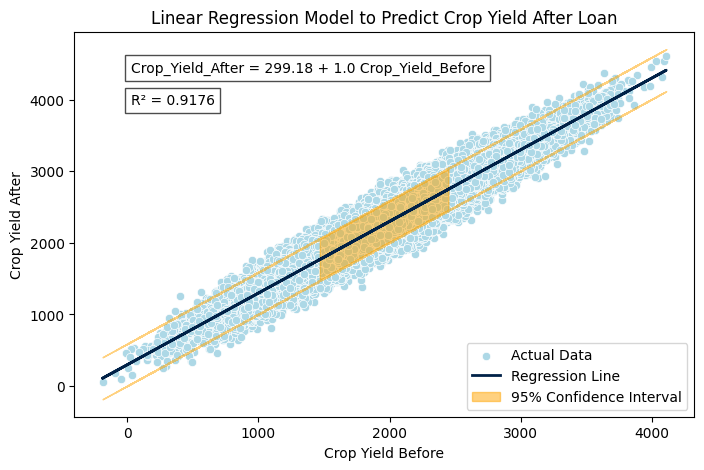

In [ ]:
# Plot the regression line with confidence interval
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X2, y=y2, label="Actual Data", color="#ADD8E6")
plt.plot(X2, y_pred2, color="#002147", label="Regression Line", linewidth=2)
plt.fill_between(X2, lower_bound2, upper_bound2, color="orange", alpha=0.5, label="95% Confidence Interval")

# Annotation for the equation
equation2 = f"Crop_Yield_After = {b2} + {m2} Crop_Yield_Before"
r1_text2 = f"R² = {r_2:.4f}"

# Adjust text positions dynamically
x_pos2 = min(X2) + (max(X2) - min(X2)) * 0.05  # Slightly right from the minimum X
y_pos_equation2 = max(y2) - (max(y2) - min(y2)) * 0.05  # 10% from the top
y_pos_r2_1 = y_pos_equation2 - (max(y2) - min(y2)) * 0.1  # Position below equation

plt.text(x_pos2, y_pos_equation2, equation2, fontsize=10, color="black",
         bbox=dict(facecolor="white", alpha=0.7))

plt.text(x_pos2, y_pos_r2_1, r1_text2, fontsize=10, color="black",
         bbox=dict(facecolor="white", alpha=0.7))

plt.xlabel("Crop Yield Before")
plt.ylabel("Crop Yield After")
plt.title("Linear Regression Model to Predict Crop Yield After Loan")
plt.legend()
plt.show()